## import necessary library

In [1]:
import pandas as pd

### Task 1 merge all 12 months sales data into 1 csv file

In [2]:
import glob

path = r'./Sales_Data'
all_files = glob.glob(path + "/*.csv")
all_files

['./Sales_Data/Sales_December_2019.csv',
 './Sales_Data/Sales_April_2019.csv',
 './Sales_Data/Sales_February_2019.csv',
 './Sales_Data/Sales_March_2019.csv',
 './Sales_Data/Sales_August_2019.csv',
 './Sales_Data/Sales_May_2019.csv',
 './Sales_Data/Sales_November_2019.csv',
 './Sales_Data/Sales_October_2019.csv',
 './Sales_Data/Sales_January_2019.csv',
 './Sales_Data/Sales_September_2019.csv',
 './Sales_Data/Sales_July_2019.csv',
 './Sales_Data/Sales_June_2019.csv']

In [3]:
for f in all_files:
    df = pd.read_csv(f)
    print(df.shape)

(25117, 6)
(18383, 6)
(12036, 6)
(15226, 6)
(12011, 6)
(16635, 6)
(17661, 6)
(20379, 6)
(9723, 6)
(11686, 6)
(14371, 6)
(13622, 6)


In [4]:
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv("merged.csv", index=False)

In [5]:
# take a look at the merged csv
merged = pd.read_csv('merged.csv')
#merged.reset_index(drop=True, inplace=True)
merged.shape

(186850, 6)

In [6]:
merged.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001"
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035"
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001"
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001"
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001"


### Drop NAN rows

In [7]:
nan = merged[merged.isna().any(axis = 1)]
nan.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
merged.dropna(how='all', inplace=True)

In [14]:
# there is no nan rows after dropping
merged[merged.isna().any(axis = 1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month of Order,Total Price


## Question1 What was the best month for sales? How much was earned that month?

### Add Month Column

In [15]:
merged['Month of Order'] = merged['Order Date'].str[:2]
merged = merged[merged['Month of Order'] != 'Or']
merged.reset_index(inplace=True)
merged['Month of Order'] = merged['Month of Order'].astype('int32')
merged.head(300)

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month of Order,Total Price
0,0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...,...
295,297,295941,ThinkPad Laptop,1,999.99,12/31/19 16:24,"64 Dogwood St, Portland, OR 97035",12,999.99
296,298,295942,Google Phone,1,600.00,12/30/19 19:21,"150 North St, Boston, MA 02215",12,600.00
297,299,295943,AAA Batteries (4-pack),3,2.99,12/04/19 13:32,"701 Sunset St, Dallas, TX 75001",12,8.97
298,300,295944,27in 4K Gaming Monitor,1,389.99,12/29/19 17:04,"175 Main St, San Francisco, CA 94016",12,389.99


### turning two columns into numeric value so that multiplication can be done

In [10]:
merged['Price Each'] = pd.to_numeric(merged['Price Each'])
merged['Quantity Ordered'] = pd.to_numeric(merged['Quantity Ordered'])


In [11]:
merged['Total Price'] = merged['Price Each']*merged['Quantity Ordered']
merged.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month of Order,Total Price
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [24]:
sales_per_month = merged.groupby('Month of Order')['Total Price'].sum()
sales_per_month.sort_values(ascending=False)

Month of Order
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Total Price, dtype: float64

### So December is the month with highest sales with $4,613,443.34 sales

### Its important to visualize the result

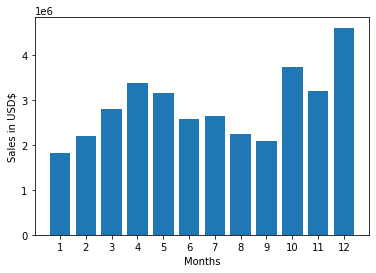

In [25]:
import matplotlib.pyplot as plt

plt.bar(range(1,13), sales_per_month)
plt.xticks(range(1,13))
plt.ylabel('Sales in USD$')
plt.xlabel('Months')
plt.show()

## Question 2 What city sold the most product?